**Coursera and EdX Analysis**

In [ ]:
import pandas as pd
df = pd.read_csv("MIE1624 - Group Project Course Curriculum.csv")

In [ ]:
df_clean = df.copy()

In [ ]:
# remove html tags and attributes
df_clean['Course Description'] = df['Course Description'].str.replace('<[^<]+?>', '')
df_clean['Topics'] = df['Topics'].str.replace('<[^<]+?>', '')
df_clean['Skills'] = df['Skills'].str.replace('<[^<]+?>', '')
df_clean['Course Name'] = df['Course Name'].str.replace('<[^<]+?>', '')

In [ ]:
# replace html character codes
import html
df_clean['Course Description'] = html.unescape(df_clean['Course Description'])
df_clean['Topics'] = html.unescape(df_clean['Topics'])
df_clean['Skills'] = html.unescape(df_clean['Skills'])
df_clean['Course Name'] = html.unescape(df_clean['Course Name'])

In [ ]:
df_clean.fillna("")

,Coursera,Course Name,Company,Course Description,Topics,Skills
0,,Introduction to Data Science Specialization,IBM,Interested in learning more about data science...,Describe what data science and machine learnin...,Data Science\nRelational Database Management S...
1,,Introduction to Data Science in Python,University of Michigan,This course will introduce the learner to the ...,Understand techniques such as lambdas and mani...,Python Programming\nNumpy\nPandas\nData Cleansing
2,,Introduction to Data Analytics,IBM,This course presents a gentle introduction int...,,Data Science\nSpreadsheet\nData Analysis\nMicr...
3,,Applied Data Science with Python Specialization,University of Michigan,The 5 courses in this University of Michigan s...,Conduct an inferential statistical analysis\n\...,Text Mining\nPython Programming\nPandas\nMatpl...
4,,Data Analysis Using Python,University of Pennsylvania,This course provides an introduction to basic ...,Apply basic data science techniques using Pyth...,Data Science\nPython Libraries\nPython Program...
...,...,...,...,...,...,...
68,,Big Data Analytics Using Spark,UC San Diego,"In data science, data is called ""big"" if it ca...",Programming Spark using Pyspark\nIdentifying t...,
69,,Data Science: Computational Thinking with Python,Berkeley,We live in an era of unprecedented access to d...,"Basics of the Python programming language, and...",
70,,Statistical Thinking for Data Science and Anal...,Columbia,This statistics and data analysis course will ...,Week 1 – Introduction to Data Science\n\nWeek ...,"Data collection, analysis and inference\nData ..."
71,,Introduction to Computational Thinking and Dat...,MIT,6.00.2x will teach you how to use computation ...,Advanced programming in Python 3\nKnapsack pro...,Plotting with the pylab package\nStochastic pr...


In [ ]:
# lowercase
df_clean['Course Description'] = df_clean['Course Description'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
df_clean['Topics'] = df_clean['Topics'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
df_clean['Skills'] = df_clean['Skills'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
df_clean['Course Name'] = df_clean['Course Name'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [ ]:
# remove punctuations
df_clean['Course Description'] = df_clean['Course Description'].str.replace('[^\w\s]', '')
df_clean['Topics'] = df_clean['Topics'].str.replace('[^\w\s]', '')
df_clean['Skills'] = df_clean['Skills'].str.replace('[^\w\s]', '')
df_clean['Course Name'] = df_clean['Course Name'].str.replace('[^\w\s]', '')

In [ ]:
# identify stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove stop words
df_clean['Course Description'] = df_clean['Course Description'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Topics'] = df_clean['Topics'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Skills'] = df_clean['Skills'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Course Name'] = df_clean['Course Name'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [ ]:
df_clean

,Coursera,Course Name,Company,Course Description,Topics,Skills
0,NaN,introduction data science specialization,IBM,interested learning data science dont know sta...,describe data science machine learning applica...,data science relational database management sy...
1,NaN,introduction data science python,University of Michigan,course introduce learner basics python program...,understand techniques lambdas manipulating csv...,python programming numpy pandas data cleansing
2,NaN,introduction data analytics,IBM,course presents gentle introduction concepts d...,nan,data science spreadsheet data analysis microso...
3,NaN,applied data science python specialization,University of Michigan,5 courses university michigan specialization i...,conduct inferential statistical analysis disce...,text mining python programming pandas matplotl...
4,NaN,data analysis using python,University of Pennsylvania,course provides introduction basic data scienc...,apply basic data science techniques using pyth...,data science python libraries python programmi...
...,...,...,...,...,...,...
68,NaN,big data analytics using spark,UC San Diego,data science data called big cannot fit memory...,programming spark using pyspark identifying co...,nan
69,NaN,data science computational thinking python,Berkeley,live era unprecedented access data understandi...,basics python programming language use tool da...,nan
70,NaN,statistical thinking data science analytics,Columbia,statistics data analysis course pave statistic...,week 1 introduction data science week 2 statis...,data collection analysis inference data classi...
71,NaN,introduction computational thinking data science,MIT,6002x teach use computation accomplish variety...,advanced programming python 3 knapsack problem...,plotting pylab package stochastic programming ...


In [ ]:
# checking for common words
word_freq_generic_course = pd.Series(''.join(df_clean['Course Description']).split()).value_counts()

In [ ]:
word_freq_generic_course

data            466
science         154
course          146
python           78
learning         74
               ... 
helped            1
newly             1
solidify          1
accomplished      1
onpremise         1
Length: 1825, dtype: int64

In [ ]:
# checking for common words
word_freq_generic_topics = pd.Series(''.join(df_clean['Topics']).split()).value_counts()

In [ ]:
word_freq_generic_topics

data             165
science           45
using             38
python            36
analysis          30
                ... 
variants           1
approaches         1
pcaunderstand      1
scatter            1
line               1
Length: 873, dtype: int64

In [ ]:
# checking for common words
word_freq_generic_skills = pd.Series(''.join(df_clean['Skills']).split()).value_counts()

In [ ]:
word_freq_generic_skills.head(30)

data              75
learning          24
analysis          22
programming       18
visualization     17
science           16
machine           14
dataviz           12
python            12
regression        11
linear             7
mining             7
clustering         6
analytics          6
predictive         6
statistics         5
text               5
algorithms         5
r                  5
model              5
recommender        5
pandas             4
language           4
inference          4
module             4
sql                4
virtualization     4
probabilistic      4
numpy              4
neural             4
dtype: int64

Add more custom stop words to remove 'obvious' words 

In [ ]:
custom_stop_words = [
   'data', 'science', 'analytics', 'course']

In [ ]:
for word in custom_stop_words:
    if word not in stop:
        stop.append(word)

In [ ]:
# remove stop words

df_clean['Course Description'] = df_clean['Course Description'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Topics'] = df_clean['Topics'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Skills'] = df_clean['Skills'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Course Name'] = df_clean['Course Name'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [ ]:
# checking for common words
word_freq_generic = pd.Series(''.join(df_clean['Course Description']).split()).value_counts()

In [ ]:
word_freq_generic.head(30)

python            78
learning          74
learn             74
analysis          61
skills            55
using             50
machine           47
specialization    42
programming       37
statistical       33
use               33
concepts          33
tools             32
youll             30
text              29
knowledge         28
apply             28
applied           27
program           26
well              26
basic             24
language          24
also              24
predictive        23
techniques        23
courses           23
used              22
learners          22
handson           22
visualization     22
dtype: int64

In [ ]:
# checking for common words
word_freq_generic_t = pd.Series(''.join(df_clean['Topics']).split()).value_counts()

In [ ]:
word_freq_generic_t.head(50)

using            38
python           36
analysis         30
learning         26
use              24
models           21
including        21
machine          20
statistical      17
random           15
r                14
create           14
tools            14
visualization    13
process          12
regression       12
different        12
statistics       12
basic            12
variables        12
apply            12
probability      11
skills           11
methods          11
build            11
make             11
describe         11
pandas           10
datasets         10
used             10
techniques       10
perform          10
analyze          10
libraries         9
unit              9
modeling          9
business          8
identify          8
algorithms        8
plots             8
jupyter           8
understanding     8
problems          8
various           8
linear            8
scientists        8
features          7
applications      7
introduction      7
sets              7


In [ ]:
# checking for common words
word_freq_generic_s = pd.Series(''.join(df_clean['Skills']).split()).value_counts()

In [ ]:
word_freq_generic_s.head(30)

learning          24
analysis          19
programming       18
visualization     17
machine           13
dataviz           12
regression        11
python             9
mining             7
linear             7
predictive         6
model              5
algorithms         5
recommender        5
statistics         5
r                  5
text               5
probabilistic      4
libraries          4
language           4
inference          4
statistical        4
module             4
sql                4
virtualization     4
neural             4
information        4
clustering         4
networks           4
pandas             4
dtype: int64

In [ ]:
# checking for common words
word_freq_generic_name = pd.Series(''.join(df_clean['Course Name']).split()).value_counts()

In [ ]:
word_freq_generic_name.head(30)

learning                      8
python                        4
machine                       3
predictive                    3
thinking                      3
specializationintroduction    3
using                         3
pythonapplied                 2
r                             2
pythonmachine                 2
models                        2
specializationapplied         2
processing                    2
specializationtext            1
plotting                      1
sparkcomputational            1
collection                    1
miningpredictive              1
pythonpython                  1
capstone                      1
pythonintroductionapplied     1
scikitlearn                   1
projectspatial                1
specializationnatural         1
linear                        1
modelingproductivity          1
accounting                    1
certificatestatistics         1
microsoft                     1
analysis                      1
dtype: int64

Pairing to see which words often are used together

In [ ]:
import sys
!{sys.executable} -m pip install rake_nltk

     |████████████████████████████████| 1.5 MB 36.9 MB/s 
     |████████████████████████████████| 749 kB 38.8 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from collections import Counter
from nltk import ngrams

processed = df_clean['Course Description'].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('machine', 'learning'), 44),
 (('python', 'applied'), 10),
 (('real', 'world'), 8),
 (('programming', 'language'), 8),
 (('handson', 'experience'), 8),
 (('professional', 'certificate'), 8),
 (('capstone', 'project'), 8),
 (('certificate', 'program'), 8),
 (('python', 'programming'), 7),
 (('text', 'mining'), 7)]

In [ ]:
from collections import Counter
from nltk import ngrams

processed = df_clean['Topics'].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('machine', 'learning'), 20),
 (('random', 'variables'), 9),
 (('using', 'python'), 7),
 (('statistical', 'analysis'), 6),
 (('tools', 'including'), 4),
 (('skills', 'needed'), 4),
 (('jupyter', 'notebooks'), 4),
 (('learning', 'algorithms'), 4),
 (('visualization', 'tools'), 4),
 (('opensource', 'library'), 4)]

In [ ]:
from collections import Counter
from nltk import ngrams

processed = df_clean['Skills'].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('visualization', 'dataviz'), 12),
 (('machine', 'learning'), 11),
 (('python', 'programming'), 7),
 (('linear', 'regression'), 5),
 (('analysis', 'visualization'), 4),
 (('r', 'programming'), 4),
 (('text', 'mining'), 4),
 (('neural', 'networks'), 4),
 (('natural', 'language'), 3),
 (('programming', 'analysis'), 3)]

Visualizing data through word clouds

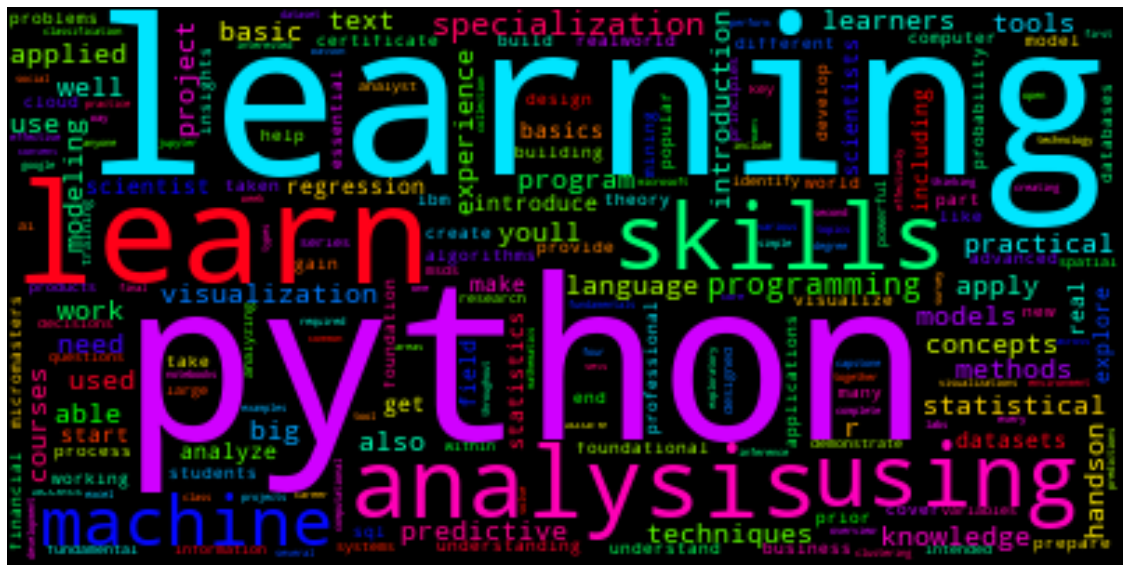

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(word_freq_generic)
plt.figure(figsize=(20,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

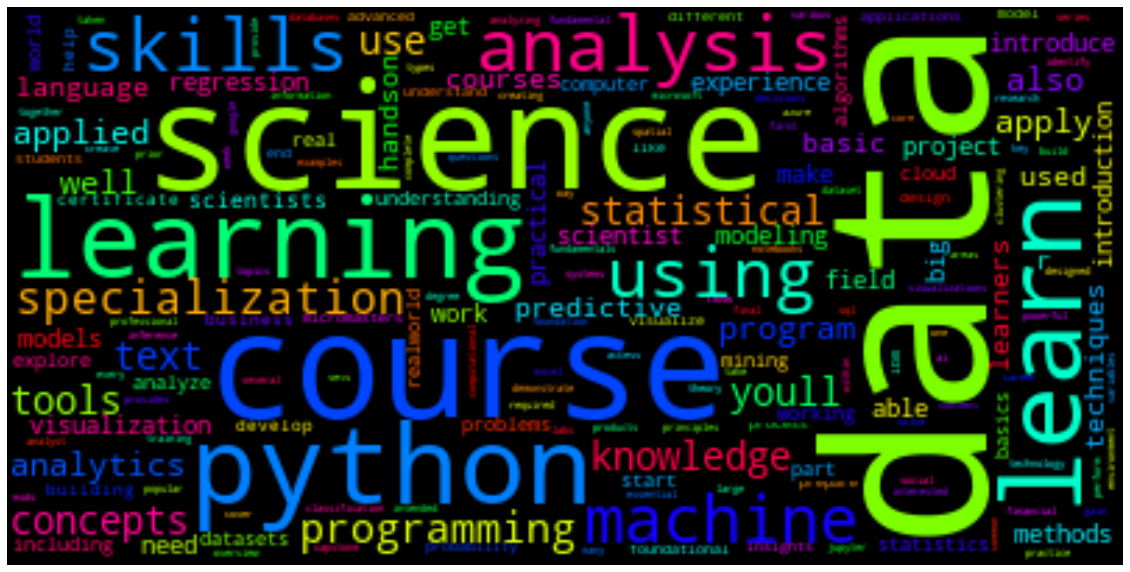

In [ ]:
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(word_freq_generic_course)
plt.figure(figsize=(20,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

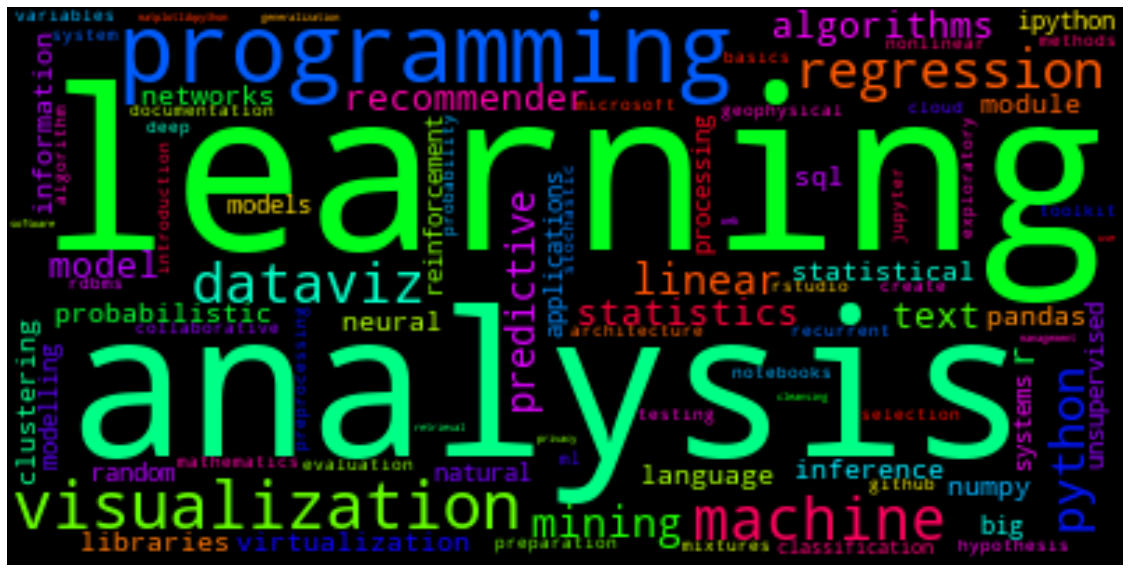

In [ ]:
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(word_freq_generic_s)
plt.figure(figsize=(20,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

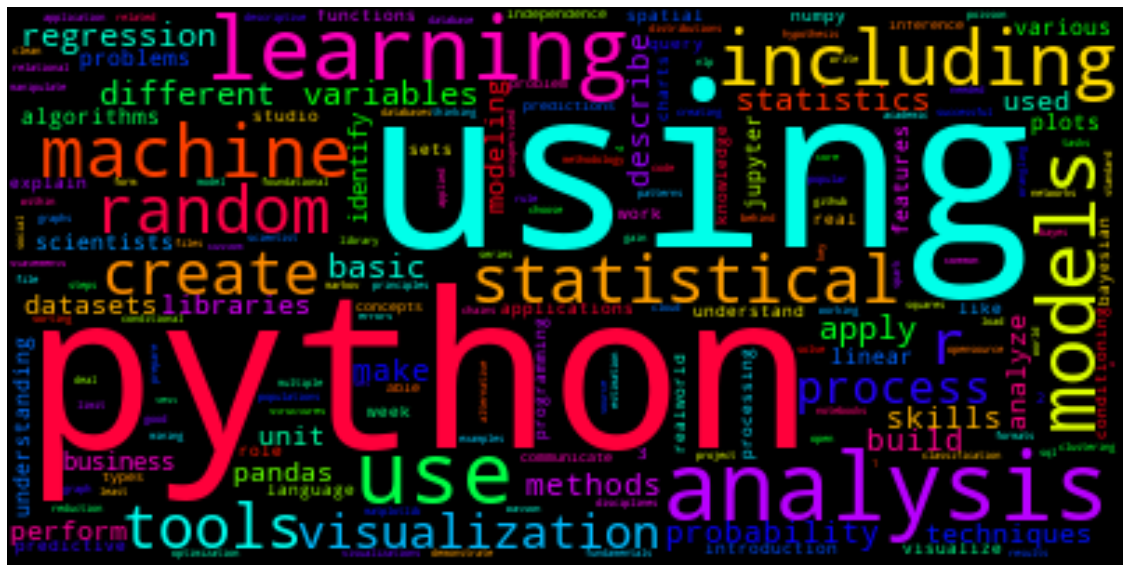

In [ ]:
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(word_freq_generic_t)
plt.figure(figsize=(20,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()